# Deep Hedging AI
### Removing the drift: simple case of Black & Scholes with drift
Hans Buehler, June 30 2022


Tensorflow version 2.7.0
Tensorflow version 2.7.0
Deep Hedging AI says hello ... 

## Deep Hedging in Black \& Scholes World with statistical arbitrage

Deep Hedging Engine: first of 400 epochs for 10000 samples (1000 validation samples) started. Compiling graph ...       


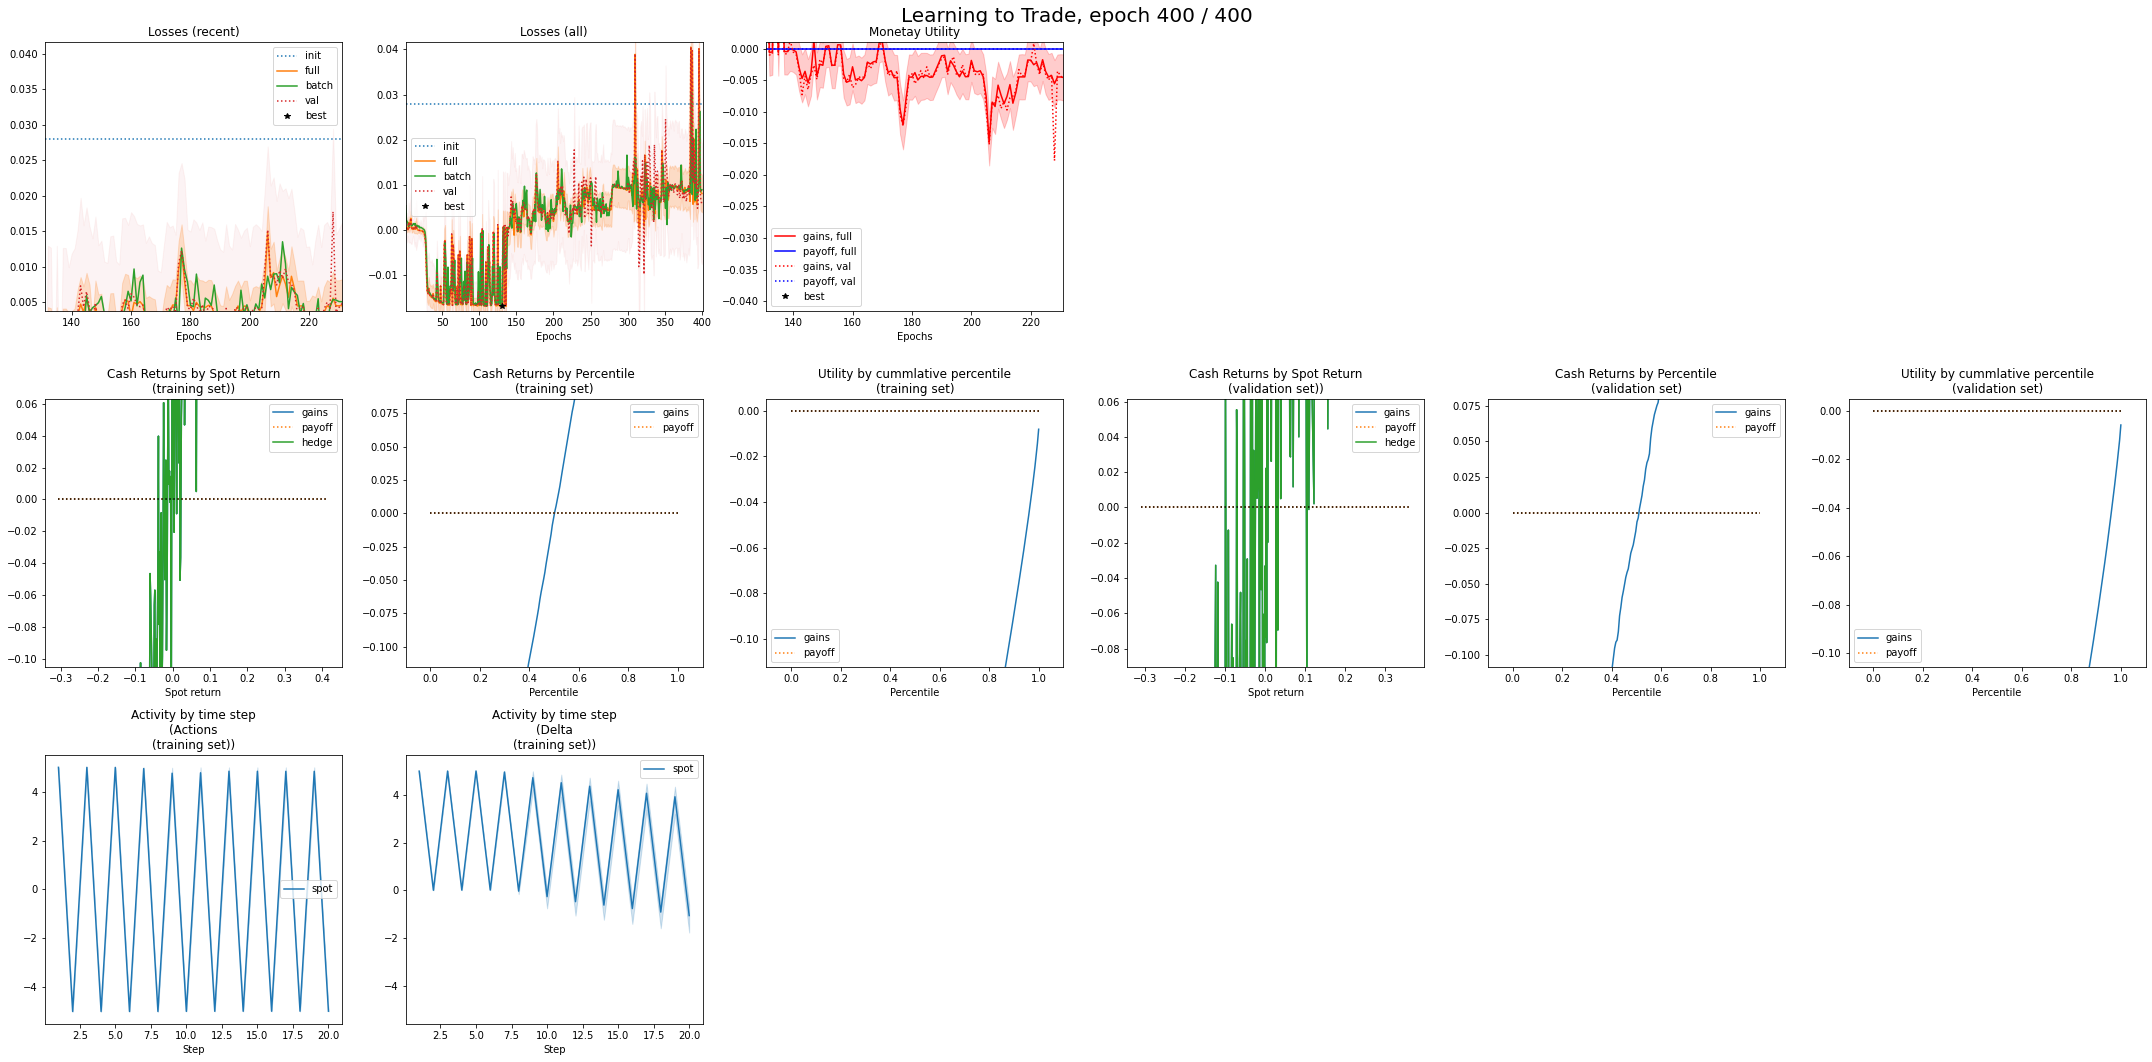

Training 400/400 epochs; 10000 samples; 1000 validation samples batch size 32 | initial loss 0.0280187 (0.00716647), full 0.00805808 (0.00417054), best -0.0169488 (0.00716647), batch 0.0088917, val 0.00581829 (0.0133579). Best batch 130 | time elapsed 48:31; estimated time remaining 7s                                   
 Status: Ran all 400 epochs

Keys of the dictionary returned by the gym:  odict_keys(['loss', 'utility', 'utility0', 'gains', 'payoff', 'pnl', 'cost', 'actions', 'deltas'])
Config usage report
config.gym.agent.network['activation'] = softplus # Network activation function; default: relu
config.gym.agent.network['depth'] = 3 # Network depth; default: 3
config.gym.agent.network['width'] = 20 # Network width; default: 20
config.gym.agent['agent_type'] = feed_forward #  Default: feed_forward
config.gym.agent['features'] = ['price', 'delta', 'time_left'] # Named features the agent uses from the environment; default: ['price', 'delta', 'time_left']
config.gym.environment['sof

In [1]:
"""
When working on the code base, activate below code:
"""
import imp
import deephedging.base as base
imp.reload(base)
import deephedging.world as world
imp.reload(world)
import deephedging.agents as agents
imp.reload(agents)
import deephedging.objectives as objectives
imp.reload(objectives)
import deephedging.gym as gym
imp.reload(gym)
import deephedging.trainer as trainer
imp.reload(trainer)

print("Deep Hedging AI says hello ... ", end='')
from cdxbasics.config import Config
from deephedging.trainer import train
from deephedging.gym import VanillaDeepHedgingGym
from deephedging.world import SimpleWorld_Spot_ATM

from IPython.display import display, Markdown

# see print of the config below for numerous options
config = Config()
# world
# We create a black scholes world with positive drift
config.world.samples = 10000
config.world.steps = 20
config.world.black_scholes = True
config.world.drift = 0.2
config.world.ivol = 0.2
config.world.rvol = 0.2
config.world.payoff = None

# gym
config.gym.objective.utility = "exp2"
config.gym.objective.lmbda = 0.1
config.gym.agent.network.depth = 3
config.gym.agent.network.activation = "softplus"
# trainer
config.trainer.train.batch_size = None
config.trainer.train.epochs = 400
config.trainer.train.run_eagerly = False
config.trainer.visual.epoch_refresh = 1
config.trainer.visual.time_refresh = 10
config.trainer.visual.confidence_pcnt_lo = 0.25
config.trainer.visual.confidence_pcnt_hi = 0.75

display(Markdown("## Try exp2 with lower risk aversion))

# create world
world  = SimpleWorld_Spot_ATM( config.world )
val_world  = world.clone(samples=1000)

# create training environment
gym = VanillaDeepHedgingGym( config.gym )

# create training environment
train( gym=gym, world=world, val_world=val_world, config=config.trainer )
r = gym(world.tf_data)
print("Keys of the dictionary returned by the gym: ", r.keys())

print("=========================================")
print("Config usage report")
print("=========================================")
print( config.usage_report() )
config.done()


Tensorflow version 2.7.0
Deep Hedging AI says hello ... 

## Deep Hedging in Black \& Scholes World with statistical arbitrage; vicky

Deep Hedging Engine: first of 400 epochs for 10000 samples (1000 validation samples) started. Compiling graph ...       


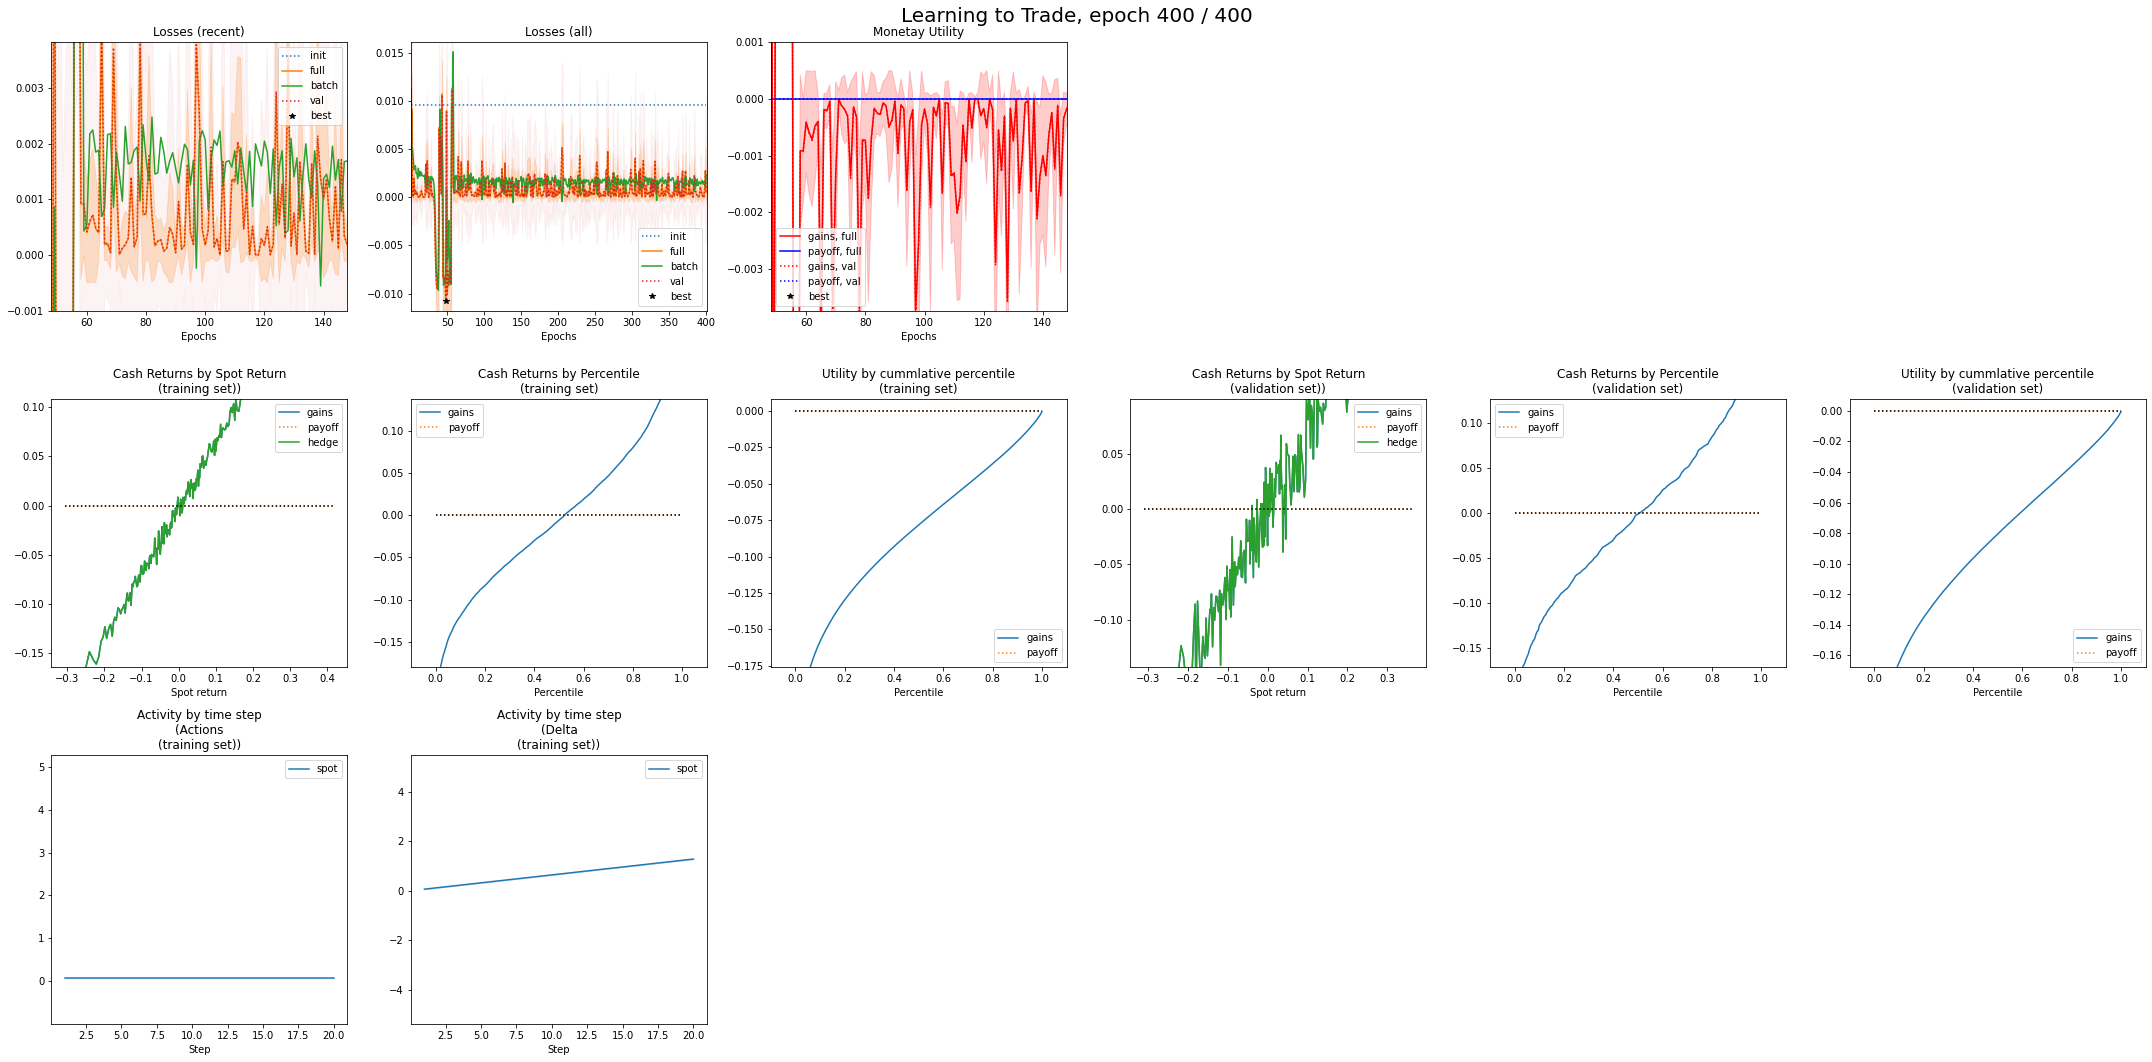

Training 400/400 epochs; 10000 samples; 1000 validation samples batch size 32 | initial loss 0.00960687 (0.00392523), full 0.000483381 (0.000982906), best -0.0107265 (0.00392523), batch 0.00231065, val 0.000497292 (0.00315407). Best batch 47 | time elapsed 1:19:34; estimated time remaining 11s                              
 Status: Ran all 400 epochs

Keys of the dictionary returned by the gym:  odict_keys(['loss', 'utility', 'utility0', 'gains', 'payoff', 'pnl', 'cost', 'actions', 'deltas'])
Config usage report
config.gym.agent.network['activation'] = softplus # Network activation function; default: relu
config.gym.agent.network['depth'] = 5 # Network depth; default: 3
config.gym.agent.network['width'] = 100 # Network width; default: 20
config.gym.agent['agent_type'] = feed_forward # Which network agent type to use; default: feed_forward
config.gym.agent['features'] = ['price', 'delta', 'time_left'] # Named features the agent uses from the environment; default: ['price', 'delta', 'tim

In [3]:
"""
When working on the code base, activate below code:
"""
import imp
import deephedging.base as base
imp.reload(base)
import deephedging.world as world
imp.reload(world)
import deephedging.agents as agents
imp.reload(agents)
import deephedging.objectives as objectives
imp.reload(objectives)
import deephedging.gym as gym
imp.reload(gym)
import deephedging.trainer as trainer
imp.reload(trainer)

print("Deep Hedging AI says hello ... ", end='')
from cdxbasics.config import Config
from deephedging.trainer import train
from deephedging.gym import VanillaDeepHedgingGym
from deephedging.world import SimpleWorld_Spot_ATM

from IPython.display import display, Markdown

# see print of the config below for numerous options
config = Config()
# world
# We create a black scholes world with positive drift
config.world.samples = 10000
config.world.steps = 20
config.world.black_scholes = True
config.world.drift = 0.2
config.world.ivol = 0.2
config.world.rvol = 0.2
config.world.payoff = None

# gym
config.gym.objective.utility = "vicky"
config.gym.objective.lmbda = 0.1
config.gym.agent.network.width = 100
config.gym.agent.network.depth = 5
config.gym.agent.network.activation = "softplus"
# trainer
config.trainer.train.batch_size = None
config.trainer.train.epochs = 400
config.trainer.train.run_eagerly = False
config.trainer.visual.epoch_refresh = 1
config.trainer.visual.time_refresh = 10
config.trainer.visual.confidence_pcnt_lo = 0.25
config.trainer.visual.confidence_pcnt_hi = 0.75

display(Markdown("## Try vicky and bigger network"))

# create world
world  = SimpleWorld_Spot_ATM( config.world )
val_world  = world.clone(samples=1000)

# create training environment
gym = VanillaDeepHedgingGym( config.gym )

# create training environment
train( gym=gym, world=world, val_world=val_world, config=config.trainer )
r = gym(world.tf_data)
print("Keys of the dictionary returned by the gym: ", r.keys())

print("=========================================")
print("Config usage report")
print("=========================================")
print( config.usage_report() )
config.done()


In [ ]:
"""
When working on the code base, activate below code:
"""
import imp
import deephedging.base as base
imp.reload(base)
import deephedging.world as world
imp.reload(world)
import deephedging.agents as agents
imp.reload(agents)
import deephedging.objectives as objectives
imp.reload(objectives)
import deephedging.gym as gym
imp.reload(gym)
import deephedging.trainer as trainer
imp.reload(trainer)

print("Deep Hedging AI says hello ... ", end='')
from cdxbasics.config import Config
from deephedging.trainer import train
from deephedging.gym import VanillaDeepHedgingGym
from deephedging.world import SimpleWorld_Spot_ATM

from IPython.display import display, Markdown

# see print of the config below for numerous options
config = Config()
# world
# We create a black scholes world with positive drift
config.world.samples = 10000
config.world.steps = 20
config.world.black_scholes = True
config.world.drift = 0.2
config.world.ivol = 0.2
config.world.rvol = 0.2
config.world.payoff = None

# gym
config.gym.objective.utility = "vicky"
config.gym.objective.lmbda = 1.
config.gym.agent.network.depth = 3
config.gym.agent.network.activation = "softplus"
config.gym.agent.network.features = [ 'price', 'delta', 'time_left', 'action' ]
# trainer
config.trainer.train.batch_size = None
config.trainer.train.epochs = 400
config.trainer.train.run_eagerly = False
config.trainer.visual.epoch_refresh = 1
config.trainer.visual.time_refresh = 10
config.trainer.visual.confidence_pcnt_lo = 0.25
config.trainer.visual.confidence_pcnt_hi = 0.75

display(Markdown("## Deep Hedging in Black \& Scholes World with statistical arbitrage"))

# create world
world  = SimpleWorld_Spot_ATM( config.world )
val_world  = world.clone(samples=1000)

# create training environment
gym = VanillaDeepHedgingGym( config.gym )

# create training environment
train( gym=gym, world=world, val_world=val_world, config=config.trainer )
r = gym(world.tf_data)
print("Keys of the dictionary returned by the gym: ", r.keys())

print("=========================================")
print("Config usage report")
print("=========================================")
print( config.usage_report() )
config.done()


In [ ]:
"""
When working on the code base, activate below code:
"""
import imp
import deephedging.base as base
imp.reload(base)
import deephedging.world as world
imp.reload(world)
import deephedging.agents as agents
imp.reload(agents)
import deephedging.objectives as objectives
imp.reload(objectives)
import deephedging.gym as gym
imp.reload(gym)
import deephedging.trainer as trainer
imp.reload(trainer)

print("Deep Hedging AI says hello ... ", end='')
from cdxbasics.config import Config
from deephedging.trainer import train
from deephedging.gym import VanillaDeepHedgingGym
from deephedging.world import SimpleWorld_Spot_ATM

from IPython.display import display, Markdown

# see print of the config below for numerous options
config = Config()
# world
# We create a black scholes world with positive drift
config.world.samples = 10000
config.world.steps = 20
config.world.black_scholes = True
config.world.drift = 0.2
config.world.ivol = 0.2
config.world.rvol = 0.2
config.world.payoff = None

# gym
config.gym.objective.utility = "vicky"
config.gym.objective.lmbda = 1.
config.gym.agent.network.depth = 3
config.gym.agent.network.activation = "softplus"
# trainer
config.trainer.train.batch_size = None
config.trainer.train.epochs = 400
config.trainer.train.run_eagerly = False
config.trainer.train.optimizer = "adam" ## ** ADAM ***
config.trainer.visual.epoch_refresh = 1
config.trainer.visual.time_refresh = 10
config.trainer.visual.confidence_pcnt_lo = 0.25
config.trainer.visual.confidence_pcnt_hi = 0.75

display(Markdown("## Deep Hedging in Black \& Scholes World with statistical arbitrage, adam"))

# create world
world  = SimpleWorld_Spot_ATM( config.world )
val_world  = world.clone(samples=1000)

# create training environment
gym = VanillaDeepHedgingGym( config.gym )

# create training environment
train( gym=gym, world=world, val_world=val_world, config=config.trainer )
r = gym(world.tf_data)
print("Keys of the dictionary returned by the gym: ", r.keys())

print("=========================================")
print("Config usage report")
print("=========================================")
print( config.usage_report() )
config.done()


In [4]:
import tensorflow as tf
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  0
